In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',shuffle=True)


In [2]:
twenty_train.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
#Here by doing ‘count_vect.fit_transform(twenty_train.data)’,
#we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features].

#The bag-of-words approach is straight forward. It starts by building a vocabulary of all the unique words occurring in all the documents in the training set.
# This vocabulary serves as feature vector for the training set

X_train_counts.shape # [n_samples, n_features].

(11314, 130107)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

#### Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:

In [12]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.

##### Performance of NB Classifier: Now we will test the performance of the NB classifier on test set.

In [13]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

# SPAM detection

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
data  = pd.read_csv("C:\\Users\\DELL I7\\Desktop\\Untitled Folder\\data set\\spam.csv",encoding='latin-1')

In [17]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### drop the unwanted column

In [ ]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [28]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# renaming the columns
data.columns = ['label','text'] 
#or
data = data.rename(columns={"v1":"label", "v2":"text"})

In [42]:
data.tail()

,label,text,label_num
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [34]:
# #Count observations in each label
data.label.value_counts(normalize = False)

ham     4825
spam     747
Name: label, dtype: int64

In [41]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0,'spam':1})

###  Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(data.text,data.label_num,test_size = 0.2,random_state =  10)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


### .Text Transformation

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
vect = CountVectorizer()

In [52]:
vect.fit(X_train)
# vect.fit function learns the vocabulary. We can get all the feature names from vect.get_feature_names( ). 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [54]:
vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [55]:
X_train_df = vect.transform(X_train)

In [56]:
X_train_df

<4457x7757 sparse matrix of type '<class 'numpy.int64'>'
	with 59187 stored elements in Compressed Sparse Row format>

In [57]:
X_test_df = vect.transform(X_test)# Now, let's transform the Test data

#### Machine Learning models

In [59]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
prediction = dict()
prediction["Multinomial"] = model.predict(X_test_df)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
accuracy_score(y_test,prediction['Multinomial'])

0.9883408071748879

#### logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()
model.fit(X_train_df,y_train)

C:\Users\DELL I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
prediction['logistic'] = model.predict(X_test_df)
accuracy_score(prediction['logistic'],y_test)

0.9802690582959641

#### knn classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
prediction['knn'] = model.predict(X_test_df)

In [81]:
accuracy_score(prediction['knn'],y_test)

0.9121076233183857

#### ensemble classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

C:\Users\DELL I7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
prediction['random_forest'] = model.predict(X_test_df)

In [84]:
accuracy_score(prediction['random_forest'],y_test)

0.9623318385650225

## Spam classification Mohit sir

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
emails = pd.read_csv("C:\\Users\\DELL I7\\Desktop\\Untitled Folder\\data set\\emails.csv") 

In [3]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
emails.get_value(58,'text') 

C:\Users\DELL I7\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'Subject: did you complete this ?  free service  mortgage rates have never been lower .  is your credit good ? get a loan beyond your wildest  expectations !  click here  your credit stinks ? lenders  will still give you an absolutely amazing loan .  click here  just click here and get started .  absolutely free quote .  click  here for quick details ! '

In [8]:
emails.shape

(5728, 2)

In [16]:
emails["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [19]:
emails.groupby('spam').count()

,text
spam,
0,4360
1,1368


In [20]:
emails.groupby('spam')

In [24]:
label_counts = emails.spam.value_counts()
print(label_counts)
label_counts.index
label_counts.values

0    4360
1    1368
Name: spam, dtype: int64


array([4360, 1368], dtype=int64)

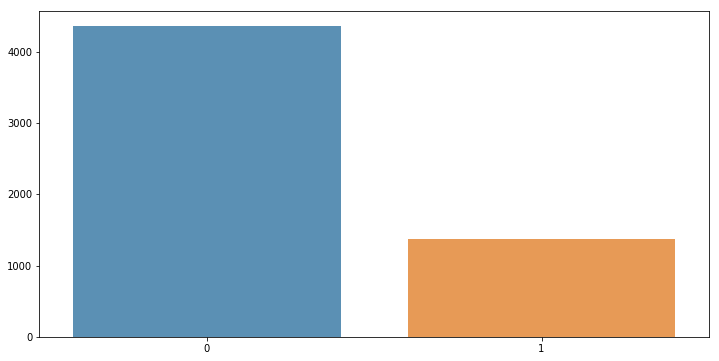

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(label_counts.index,label_counts.values,alpha = .8)
plt.

In [35]:
emails['length']=emails['text'].map(lambda x: len(x))

In [44]:
emails.groupby('spam').length.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
0,4360.0,1631.918119,1959.664549,13.0,577.75,1122.0,2037.25,43952.0
1,1368.0,1317.257310,2271.372893,18.0,401.50,693.5,1250.25,28432.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB38D2A160>,
      dtype=object)

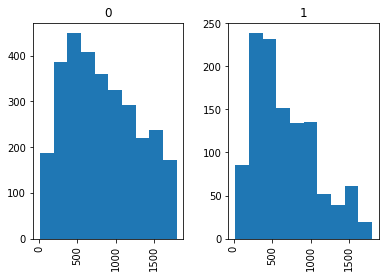

In [48]:
emails_subset=emails[emails['length']<1800]
emails_subset.hist(column = 'length',by = 'spam')

In [50]:
emails['tokens']=emails['text'].map(lambda x : nltk.tokenize.word_tokenize(x))

In [52]:
print(emails.tokens[1])

['Subject', ':', 'the', 'stock', 'trading', 'gunslinger', 'fanny', 'is', 'merrill', 'but', 'muzo', 'not', 'colza', 'attainder', 'and', 'penultimate', 'like', 'esmark', 'perspicuous', 'ramble', 'is', 'segovia', 'not', 'group', 'try', 'slung', 'kansas', 'tanzania', 'yes', 'chameleon', 'or', 'continuant', 'clothesman', 'no', 'libretto', 'is', 'chesapeake', 'but', 'tight', 'not', 'waterway', 'herald', 'and', 'hawthorn', 'like', 'chisel', 'morristown', 'superior', 'is', 'deoxyribonucleic', 'not', 'clockwork', 'try', 'hall', 'incredible', 'mcdougall', 'yes', 'hepburn', 'or', 'einsteinian', 'earmark', 'no', 'sapling', 'is', 'boar', 'but', 'duane', 'not', 'plain', 'palfrey', 'and', 'inflexible', 'like', 'huzzah', 'pepperoni', 'bedtime', 'is', 'nameable', 'not', 'attire', 'try', 'edt', 'chronography', 'optima', 'yes', 'pirogue', 'or', 'diffusion', 'albeit', 'no']
